Estimated Natural Frequency: 0.00 Hz
Peak at frequency 0.44 Hz with magnitude 4589.77
Peak at frequency 1.45 Hz with magnitude 4139.40
Peak at frequency 1.52 Hz with magnitude 6106.44
Peak at frequency 1.69 Hz with magnitude 16846.53
Peak at frequency 1.79 Hz with magnitude 19287.37


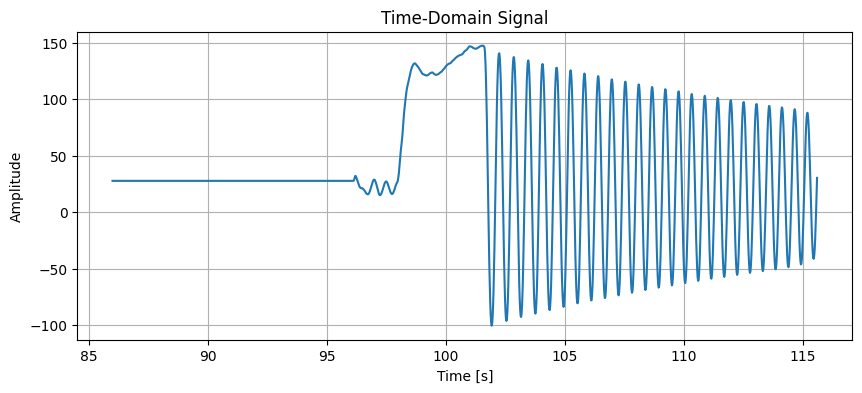

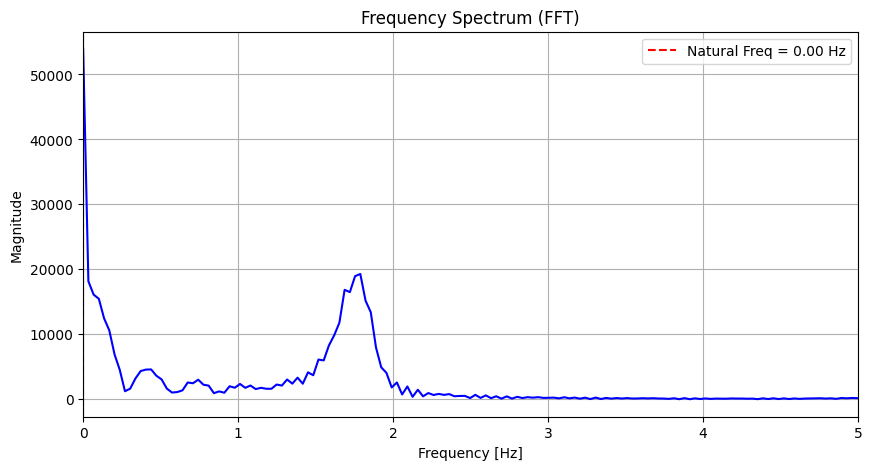

In [6]:
# Milestone 2 - Scenario 1
import numpy as np
import matplotlib.pyplot as plt
import sys, os

import pandas as pd
from scipy.signal import find_peaks

data_filename = 'naturalFreq1.csv'   # ensure this file is in the same directory
data = pd.read_csv(data_filename, header=None, names=['Time', 'Amplitude'])

# Convert time to seconds
if data['Time'].max() > 1000:
    data['Time'] = data['Time'] / 1000.0

t = data['Time'].values
y = data['Amplitude'].values

# Sampling
dt = np.mean(np.diff(t))
Fs = 1.0 / dt   # Sampling frequency [Hz]
N = len(y)

#Fourier Transform
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(N, d=dt)

# Only keep the positive half
positive_freqs = freqs[:N // 2]
magnitude = np.abs(Y[:N // 2])

# Find natural frequency
dominant_idx = np.argmax(magnitude)
natural_frequency = positive_freqs[dominant_idx]
print(f"Estimated Natural Frequency: {natural_frequency:.2f} Hz")
# Find peaks in the frequency spectrum (excluding zero frequency)
peaks_idx, _ = find_peaks(magnitude[1:])  # Skip first element (DC component)
peaks_idx += 1  # Adjust indices to account for skipped first element

# Sort peaks by magnitude and get top 5
sorted_peaks_idx = peaks_idx[np.argsort(magnitude[peaks_idx])][-5:]  # Get indices of 5 largest peaks
sorted_peaks_idx = sorted_peaks_idx[np.argsort(positive_freqs[sorted_peaks_idx])]  # Sort by frequency

# Print frequency and magnitude of top 5 peaks
for idx in sorted_peaks_idx:
    print(f"Peak at frequency {positive_freqs[idx]:.2f} Hz with magnitude {magnitude[idx]:.2f}")

#Plot
plt.figure(figsize=(10,4))
plt.plot(t, y)
plt.title("Time-Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(positive_freqs, magnitude, color='b')
plt.axvline(natural_frequency, color='r', linestyle='--', label=f'Natural Freq = {natural_frequency:.2f} Hz')
plt.title("Frequency Spectrum (FFT)")
plt.xlabel("Frequency [Hz]")
plt.xlim(0,5)
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()
